![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [18]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Loading the workout dataset
workout = pd.read_csv("data/workout.csv", parse_dates=["month"])

workout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   month              61 non-null     datetime64[ns]
 1   workout_worldwide  61 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [20]:
workout.head()

,month,workout_worldwide
0,2018-03-01,59
1,2018-04-01,61
2,2018-05-01,57
3,2018-06-01,56
4,2018-07-01,51


1. When was the global search for 'workout' at its peak? Save the year of peak interest as a string named year_str in the format "yyyy".

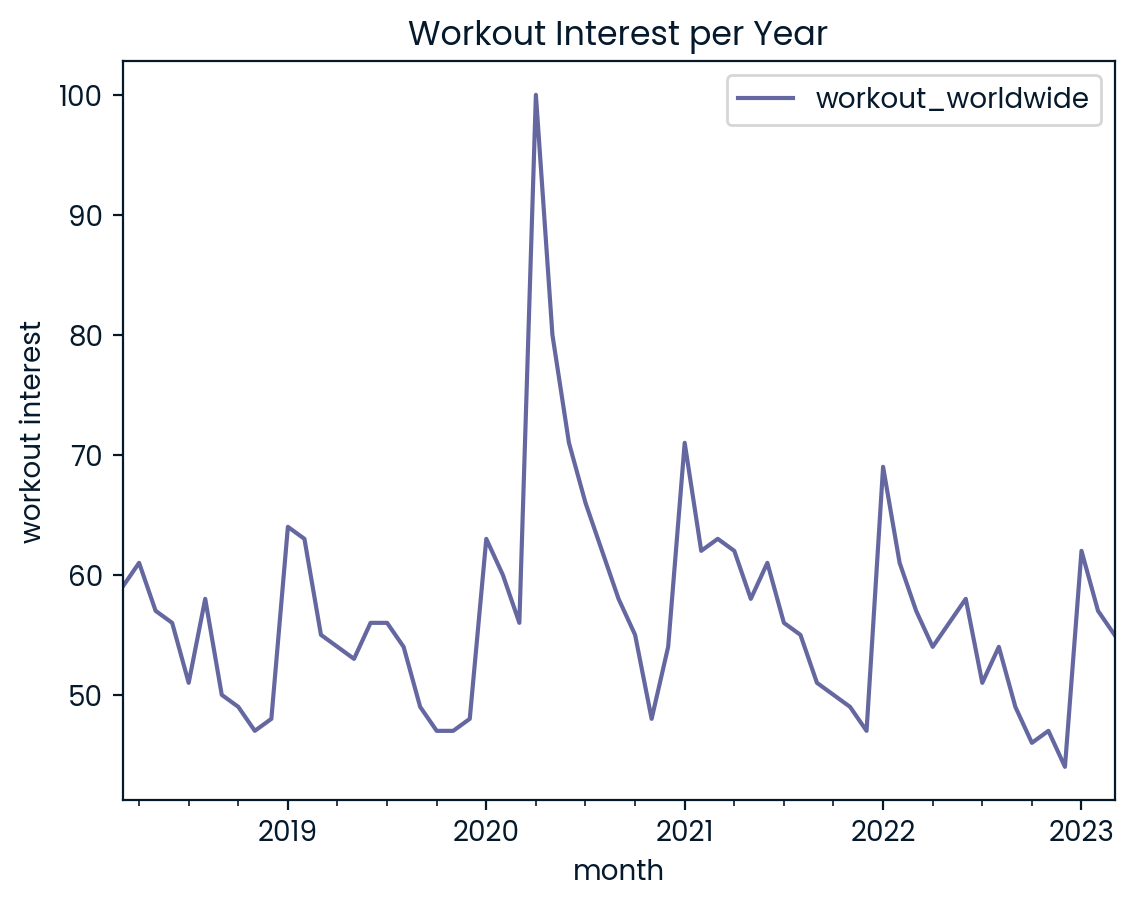

In [21]:

workout.plot(x="month", y="workout_worldwide", ylabel="workout interest",
            title="Workout Interest per Year")
plt.show()

In [22]:
# Grouping by year and calculating the mean of the workout worldwide column
workout['year'] = workout['month'].dt.year
yearly_mean_workout = workout.groupby('year')['workout_worldwide'].mean().reset_index()

# Finding the year with the maximum mean workout interest
max_year = yearly_mean_workout.loc[yearly_mean_workout['workout_worldwide'].idxmax(), 'year']

# Assigning the year to year_str in the format "yyyy"
year_str = str(max_year)
year_str

'2020'

Question 2

In [23]:
# Loading the next dataset
three_keywords = pd.read_csv("data/three_keywords.csv", parse_dates=["month"])
three_keywords.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03-01,12,16,10
1,2018-04-01,12,18,10
2,2018-05-01,13,16,9
3,2018-06-01,12,17,9
4,2018-07-01,12,17,9


In [24]:
three_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   month                   61 non-null     datetime64[ns]
 1   home_workout_worldwide  61 non-null     int64         
 2   gym_workout_worldwide   61 non-null     int64         
 3   home_gym_worldwide      61 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.0 KB


2. Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now? Save your answers as variables called peak_covid and current respectively.

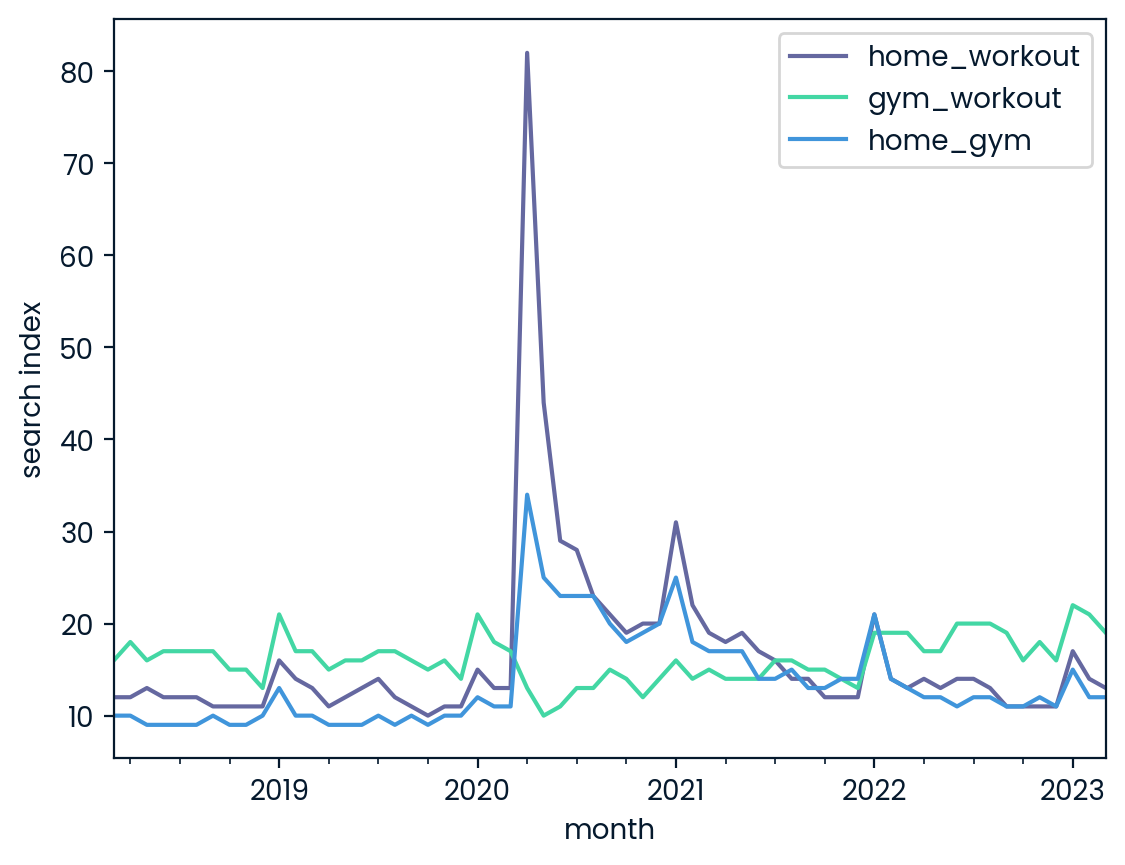

In [25]:
ax = three_keywords.plot(x="month", y="home_workout_worldwide", 
                         label="home_workout")
three_keywords.plot(x="month", y="gym_workout_worldwide", ax=ax,
                    label="gym_workout")
three_keywords.plot(x="month", y="home_gym_worldwide", ax=ax,
                    label="home_gym", ylabel="search index")
plt.show()

In [26]:
peak_covid = "home workout"
current="gym workout"

Question 3

In [27]:
workout_geo = pd.read_csv("data/workout_geo.csv")
workout_geo.head()

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN


3. What country has the highest interest for workouts among the following: United States, Australia, or Japan? Save your answer as top_country.



In [28]:
#Subsetting for relevant countries
countries = ["United States", "Japan", "Australia"]
relevant = workout_geo.loc[workout_geo["country"].isin(countries), :].reset_index(drop=True)
relevant.head()

,country,workout_2018_2023
0,United States,100.0
1,Australia,77.0
2,Japan,1.0


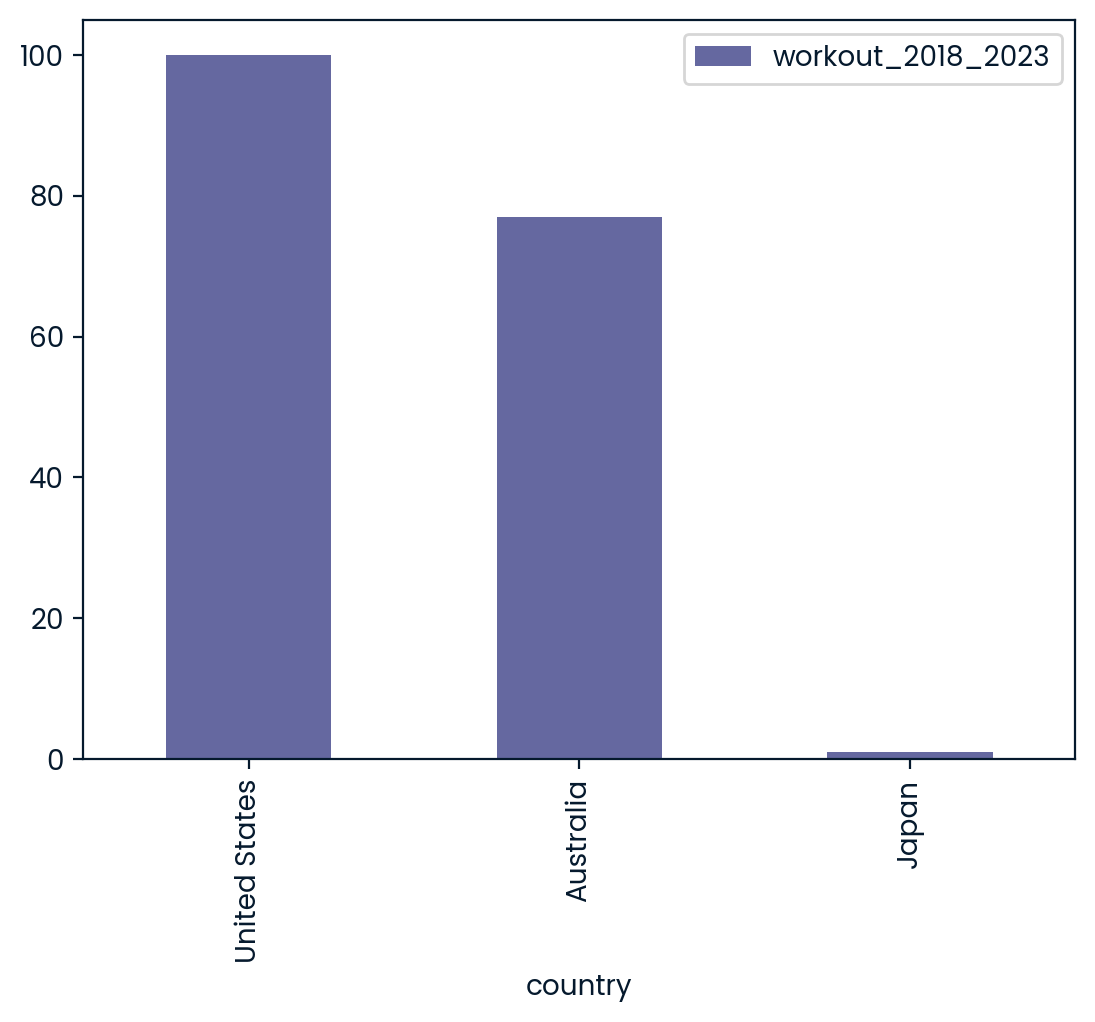

In [29]:
# Visualizing the answer
relevant.plot(x="country", y="workout_2018_2023", kind="bar")
plt.show()

top_country= "United States"

Question 4

In [30]:
#Loading the dataset
three_keywords_geo = pd.read_csv("data/three_keywords_geo.csv")
three_keywords_geo.head()

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN


4. You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts? Identify the country and save it as home_workout_geo.

In [31]:
# Filtering for relevant columns
countries =["Philippines", "Malaysia"]
relevant = three_keywords_geo.loc[three_keywords_geo["Country"].isin(countries), ["Country", "home_workout_2018_2023"]]
relevant.head()

,Country,home_workout_2018_2023
23,Philippines,52.0
61,Malaysia,47.0


In [32]:
home_workout_geo= "Philippines"